In [1]:
#imported important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv("C:/Users/Admin/Pictures/archive/Training.csv")

In [3]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [4]:
#They are 4920 rows, 133 columns
df.shape

(4920, 133)

In [5]:
#seeing any null values are there with descending format
df.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
#looking how much percent each diseases having
df['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

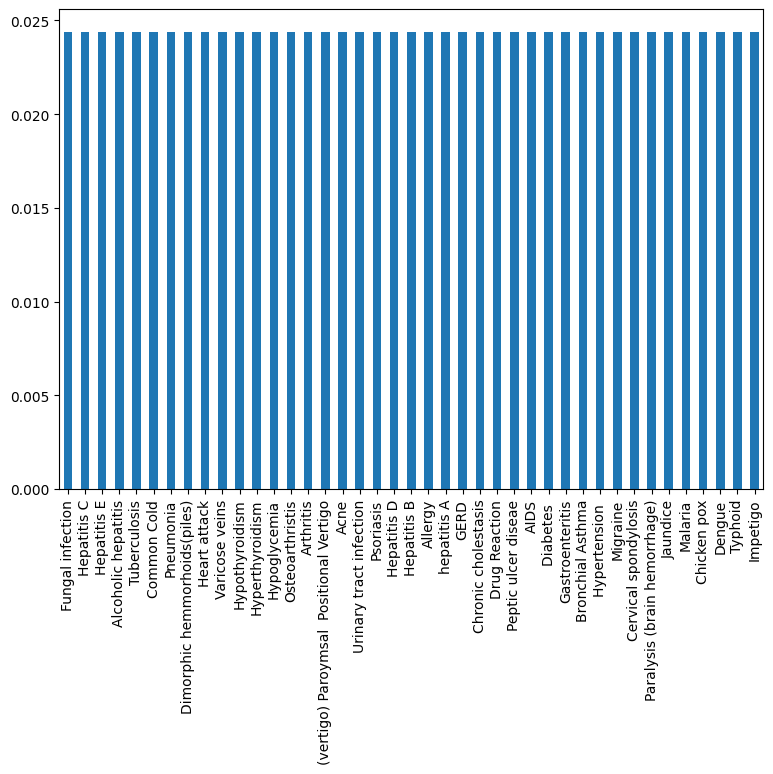

In [8]:
#as we can see each no. diseases having the same percentage through bar chart
df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

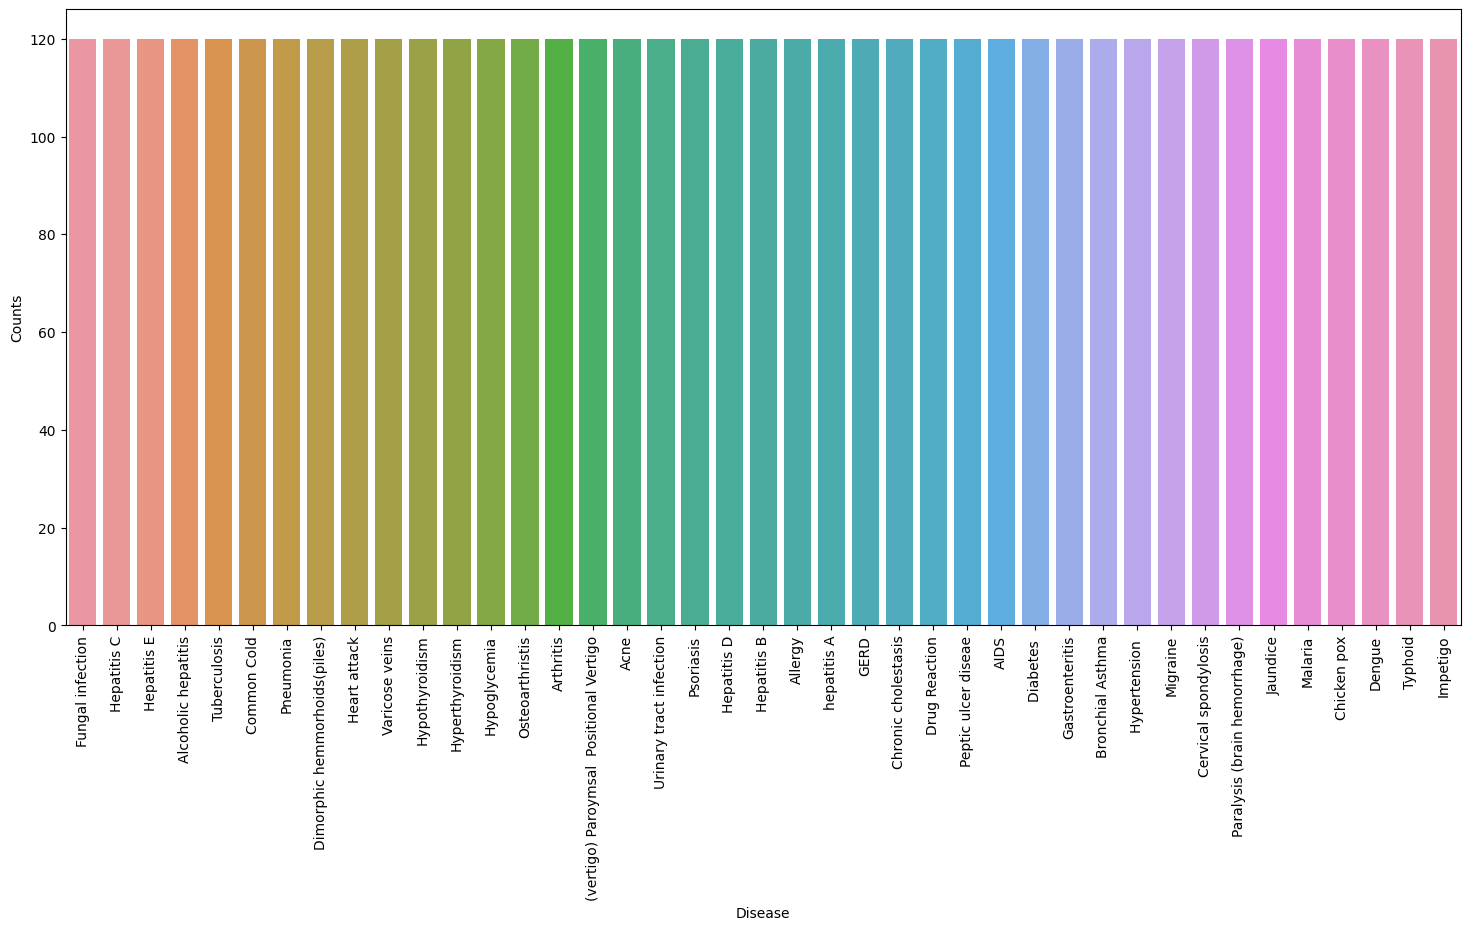

In [9]:
data = df.dropna(axis = 1)
 
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [10]:
#checking if there are any other data types
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

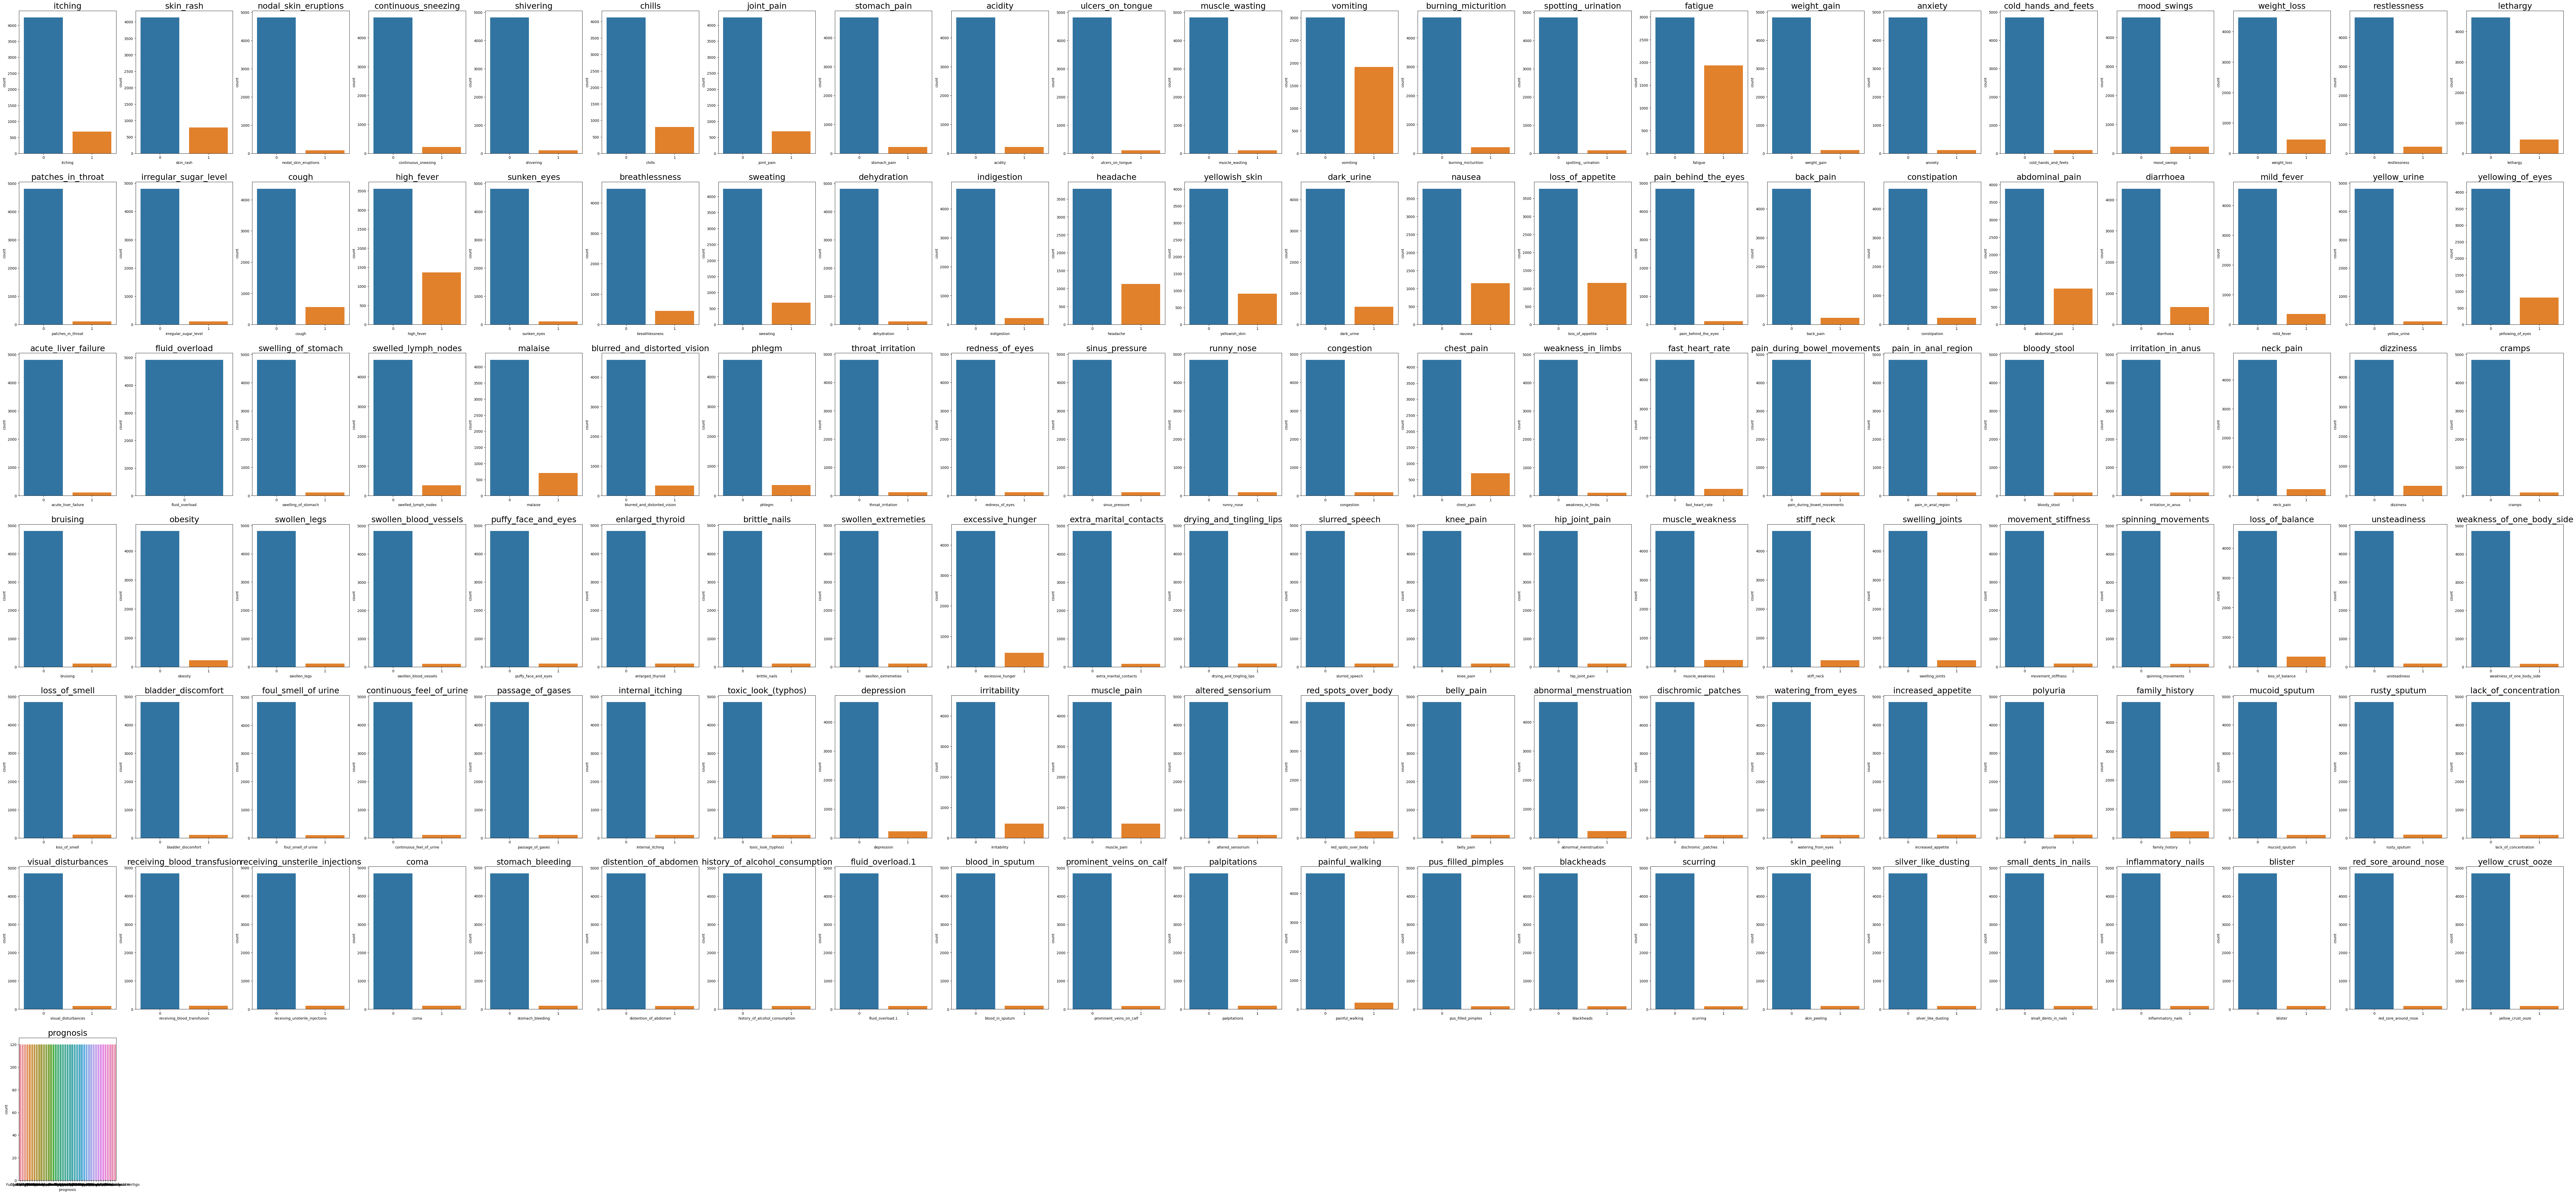

In [11]:
#Analyzing each symptoms/variable
for x in range(df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize=23)

In [12]:
#checking the relationship between the variables by applying the correlation 
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

<AxesSubplot: >

In [13]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(df['cold_hands_and_feets'],df['weight_gain'])

weight_gain              0    1
cold_hands_and_feets           
0                     4800    6
1                        6  108

In [14]:
#imported the chi square contingency
from scipy.stats import chi2_contingency

In [15]:
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

(4362.40173527245,
 0.0,
 1,
 array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [16]:
#seperated the independent and dependent values to repective variables 
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

In [20]:
#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = mnb.predict(x_test)

In [23]:
accuracy_score(y_pred,y_test)

1.0

In [24]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [25]:
real_diseases = y_test.values

In [26]:
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

In [27]:
#imported Kfold
from sklearn.model_selection import KFold

In [28]:
## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)   

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [30]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb}
algo_train_scores={}
algo_test_scores={}

In [31]:
#decision tree was found to be best fit with training score of 1.0 and testing score of 0.96 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.875609756097561, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.998780487804878, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


In [32]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

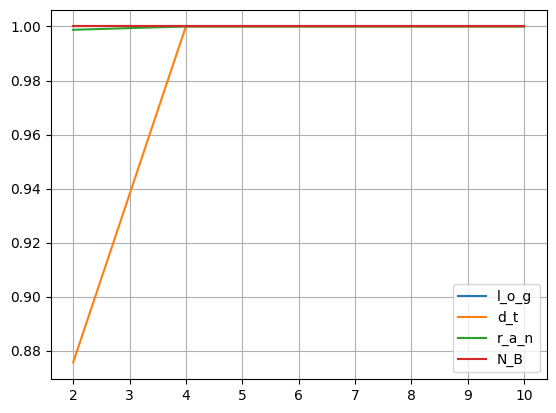

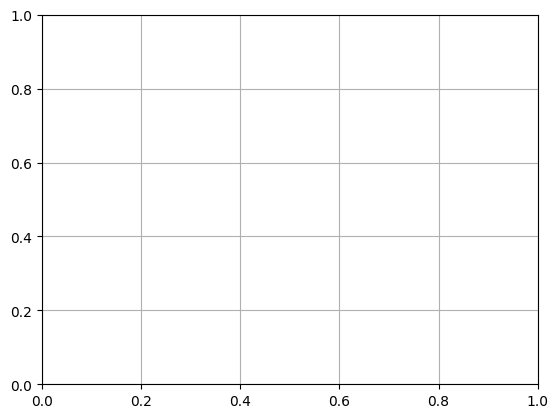

In [33]:
df_test.plot(grid = 1)
plt.show()
plt.grid()

In [34]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [35]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.8719512195121951}


In [36]:
#saved the model 
import joblib
joblib.dump(dt,'trained_model')

['trained_model']

#Saurabh Uppal 